In [1]:
import pickle 

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

%matplotlib inline

In [5]:
with open("sim_result.pkl","rb") as handle:
    trajectory = pickle.load(handle)

hamiltonian = trajectory
print(trajectory["initial"])

{'k_vec': array([[0.00729927, 0.        , 0.        ],
       [0.        , 0.00729927, 0.        ],
       [0.        , 0.        , 0.00729927]]), 'k_const': None}


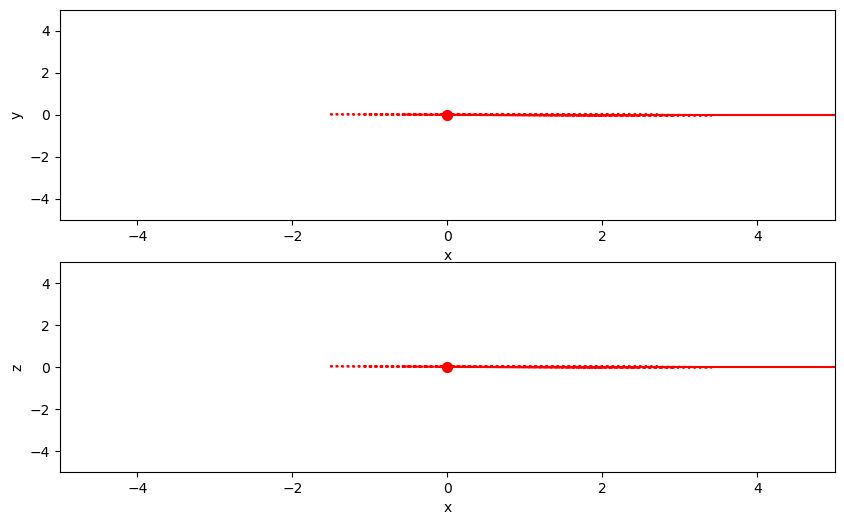

In [12]:
num_points = len(trajectory["r"][0])

#a = np.random.rand(2000, 3)*10
t = np.arange(len(trajectory))
color_list = ["red","blue","black","green"]

def update_graph(num):
    for i in range(num_points):
        data = list(np.real(trajectory["r"][num][i]))
        data_v = list(np.real(trajectory["v"][num][i]))
        
        scat_xy[i].set_offsets([data[0], data[1]])
        scat_xz[i].set_offsets([data[0], data[2]])
        
        plot_xy_v[i].set_xdata(
            [data[0],data[0]+data_v[0]])
        plot_xy_v[i].set_ydata(
            [data[1],data[1]+data_v[1]])
        plot_xz_v[i].set_xdata(
            [data[0],data[0]+data_v[0]])
        plot_xz_v[i].set_ydata(
            [data[2],data[2]+data_v[2]])

fig, ax = plt.subplots(2,figsize=(10,6))

scat_xy = []
scat_xz = []
plot_xy = []
plot_xz = []
plot_xy_v = []
plot_xz_v = []

for i in range(num_points):
    data = list(np.real(trajectory["r"][0][i]))
    scat_xy.append(
        ax[0].scatter(data[0], data[1], s = 50,c=color_list[i]))
    scat_xz.append(
        ax[1].scatter(data[0], data[2], s = 50,c=color_list[i]))

    data_v = list(np.real(trajectory["v"][0][i]))
    plot_xy_v.append(
        ax[0].plot(
            (data[0],data[0]+data_v[0]), (data[1],data[1]+data_v[1]),c=color_list[i]
    )[0])
    plot_xz_v.append(
        ax[1].plot(
            (data[0],data[0]+data_v[0]), (data[2],data[2]+data_v[2]),c=color_list[i]
    )[0])

    data = np.real(trajectory["r"][:])[:,i]
    ax[0].plot(data[:,0], data[:,1],linestyle="dotted",c=color_list[i])
    ax[1].plot(data[:,0], data[:,2],linestyle="dotted",c=color_list[i])


maxlim = 5
minlim = -5
ax[0].set_xlim(minlim,maxlim)
ax[0].set_ylim(minlim,maxlim)
ax[1].set_xlim(minlim,maxlim)
ax[1].set_ylim(minlim,maxlim)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")


ani = animation.FuncAnimation(fig, update_graph, len(trajectory["r"]), interval=0.01, blit=False)
#fig.show()
#fig.savefig("morse_trajectory.jpeg",dpi=600)

ani.save(filename="trajectory.gif", writer="pillow")

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, frames=40, 
                               interval=40,blit=False)

plt.show()

In [ ]:
df

In [ ]:
data=df[df['time']==2]
data

In [ ]:
list(np.real(trajectory[1][0]))